# 数值计算方法

2024 年秋季学期本科

## 第 2 章 数值线性代数

### 引言

线性方程组在科学（包括自然科学和人文社科）与工程领域的用途十分广泛，其理论基础**数值线性代数**(numerical linear algebra)，旨在研究如何用矩阵运算来设计高效的计算机算法，以有限的精度来近似求解科学与工程领域提出的连续数学问题.

#### 数值线性代数的重要库

- Matrix Market ([https://math.nist.gov/MatrixMarket/](https://math.nist.gov/MatrixMarket/))：数值线性代数算法存档和比较
- Netlib ([https://netlib.org/](https://netlib.org/)）：包括 LAPACK 在内的大型数值软件库
- Arpack ([http://lacsi.rice.edu/software/arpak/default.htm](http://lacsi.rice.edu/software/arpak/default.htm)）：大型稀疏特征值问题的软件包
- ICL｜创新计算实验室 ([https://icl.utk.edu/](https://icl.utk.edu/)）：先进的矩阵计算高性能库
- MKL ([https://www.intel.com/content/www/us/en/docs/onemkl/get-started-guide/2023-0/overview.html](https://www.intel.com/content/www/us/en/docs/onemkl/get-started-guide/2023-0/overview.html))：英特尔数学核心库\\中文文档 ([http://scc.ustc.edu.cn/zlsc/user\_doc/html/intel-mkl/intel-mkl.html](http://scc.ustc.edu.cn/zlsc/user\_doc/html/intel-mkl/intel-mkl.html))

#### 基础知识回顾

如下形式描述了由 $n$ 个未知元的 $m$ 个线性方程组成的**线性方程组** (system of linear equations) 或**线性系统** (linear system).

$$\begin{align*}
&a_{11}x_1+a_{12}x_2+\dots+a_{1n}x_n=b_1\\
&a_{21}x_1+a_{22}x_2+\dots+a_{2n}x_n=b_2\\
&\dots\\
&a_{m1}x_1+a_{m2}x_2+\dots+a_{mn}x_n=b_m
\end{align*}$$

线性方程组通常转为一个**矩阵** (matrix) 来分析. 矩阵包含了求解方程组所需的所有信息，且易于在计算机上表示.

一个 $m\times n$ 的矩阵是指具有 $m$ 行 $n$ 列元素的矩形阵列，其中元素的值和位置都重要. 

$${\boldsymbol{A}}=[a_{ij}]=\begin{bmatrix}
a_{11} & a_{12} & \dots & a_{1n}\\
a_{21} & a_{22} & \dots & a_{2n}\\
\vdots & \vdots & \ddots & \vdots\\
a_{m1} & a_{m2} & \dots & a_{mn}
\end{bmatrix}$$

$1\times n$ 矩阵称为 $n$ 维**行向量** (row vector)，即 $${\boldsymbol{A}}=\begin{bmatrix}
a_{11} & a_{12} & \dots & a_{1n}\end{bmatrix}$$ $n\times 1$ 矩阵称为 $n$ 维**列向量** (column vector)，即

$${\boldsymbol{A}}=\begin{bmatrix}
a_{11}\\
a_{21}\\
\vdots\\
a_{n1}
\end{bmatrix}$$

通常，向量可以省略不必要的下标，因为它仅表示单个维度上的元素. 有时，还会用逗号分隔紧凑表示，例如 $${\boldsymbol{x}}=[x_1,x_2,\dots,x_n]$$

对于线性方程组

$$\begin{align*}
&a_{11}x_1+a_{12}x_2+\dots+a_{1n}x_n=b_1\\
&a_{21}x_1+a_{22}x_2+\dots+a_{2n}x_n=b_2\\
&\vdots\\
&a_{m1}x_1+a_{m2}x_2+\dots+a_{mn}x_n=b_m
\end{align*}$$

可以构造

$$\tilde{{\boldsymbol{A}}}=[{\boldsymbol{A}},{\boldsymbol{b}}]=
\left[\begin{array}{cccc|c}
a_{11} & a_{12} & \dots   & a_{1n} & b_{1}  \\
a_{21} & a_{22} & \dots   & a_{2n} & b_{2}  \\
\vdots & \vdots & \ddots  & \vdots & \vdots \\
a_{m1} & a_{m2} & \dots   & a_{mn} & b_{m}
\end{array}\right]$$

这个矩阵叫做**增广矩阵** (augmented matrix). 其中竖线分隔了未知量的系数和方程右端项.

#### 求解线性方程组的方法

如果不考虑计算过程的舍入误差，求解线性方程组的直接法经过**有限次**的运算以求得方程组的准确解. 而迭代法是一种近似方法，按某种规则逐次生成一个**无穷(向量)序列**，并使其极限逼近方程组的解.

直接法与迭代法的简要对比如下

|特性 | 直接法 | 迭代法 |
|--|--|--|
|计算量 | 较小 | 一般较大 |
|存储需求 | 较大 | 较小 |
|程序复杂度 | 复杂 | 简单 |
|适用矩阵规模 | 低阶 | 高阶 |

### 直接法

#### Gauss 消元法

考虑系数矩阵大小为 $n\times n$ 的情景，首先将线性方程组记为增广矩阵 $\tilde{\boldsymbol{A}}$
$$\tilde{{\boldsymbol{A}}}=[{\boldsymbol{A}},{\boldsymbol{b}}]=\left[\begin{array}{cccc|c}
a_{11} & a_{12} & \dots  & a_{1n} & a_{1,n+1}\\
a_{21} & a_{22} & \dots  & a_{2n} & a_{2,n+1}\\
\vdots & \vdots & \ddots & \vdots & \vdots\\
a_{n1} & a_{n2} & \dots  & a_{nn} & a_{n,n+1}
\end{array}\right]$$

设第 $j$ 行代表的方程为 $E_j$. 若 $a_{11}\ne0$，对每个 $j=2,3,\dots,n$ 做运算 $E_j := (E_j - \displaystyle\frac{a_{j1}}{a_{11}}E_1)$ 来消去其余行中未知量 $x_1$ 的系数. 矩阵的系数可能变化，但这里仍然用原来的 $a_{ij}$ 表示. 继续对 $i=2,3,\dots,n$ 做运算 $E_j := (E_j - \displaystyle\frac{a_{ji}}{a_{ii}}E_j)$，其中 $j=i+1,i+2,\dots,n$

如此继续，直到矩阵变为一个与原方程组同解的增广矩阵 $\tilde{\tilde{\boldsymbol{A}}}$，它是一个三角阵.
$$\tilde{\tilde{\boldsymbol{A}}}=\left[\begin{array}{cccc|c}
a_{11} & a_{12} & \dots & a_{1n} & a_{1,n+1}\\
0 & a_{22} & \dots & a_{2n} & a_{2,n+1}\\
\vdots & \vdots & \ddots & \vdots & \vdots\\
0 & 0 & \dots & a_{nn} & a_{n,n+1}
\end{array}\right]$$

以上为**消元** (elimination) 过程，接下来进行**回代** (backward substitution) 过程. 

解第 $n$ 个方程得到 $x_n=\displaystyle\frac{a_{n,n+1}}{a_{nn}}$. 已知 $x_n$ 之后可以代入第 $(n-1)$ 个方程继续求解，以此类推. 一般地，对于 $x_i$，我们有 $$x_i=\frac{1}{\displaystyle a_{ii}}\left(\displaystyle a_{i,n+1}-\sum_{j=i+1}^na_{ij}x_j\right),\quad i = n-1, n-2, \dots, 1$$

下面用 Python 代码表示这个过程

In [5]:
import numpy as np

def gauss_elimination(A, b):
    n = len(A)
    Ab = np.hstack((A.astype(float), b.reshape(-1, 1).astype(float)))
    
    for i in range(n-1):
        if Ab[i, i] == 0:
            print("失败：主元为零，无法继续消元")
            return None
        for j in range(i+1, n):
            factor = Ab[j, i] / Ab[i, i]
            Ab[j, i:] -= factor * Ab[i, i:]
    if Ab[n-1, n-1] == 0:
        print("失败：没有唯一解")
        return None
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (Ab[i, -1] - np.dot(Ab[i, i+1:n], x[i+1:n])) / Ab[i, i]
    return x

In [6]:
# 测试例
A = np.array([[1, 2, 1],[-1, 2, 2],[0, 1, -1]])
x = np.ones(3)
b = A @ x

gauss_elimination(A, b)

array([1., 1., 1.])

In [7]:
A = np.array([[0, 1, -1],[1, 2, 1],[-1, 2, 2]])
x = np.ones(3)
b = A @ x

gauss_elimination(A, b)

失败：主元为零，无法继续消元


这个例子表明，朴素的 Gauss 消元对主元的取值有要求. 当主元为零时，算法只能停止. 当主元相对于其他元素很小的时候，会放大误差. 在实际问题中，因为系数的微小扰动引起解的巨大变化，属于扰动分析的研究范围. 

一种常见的改进方法如下. 可以在备选的主元中选择量级最大的元素. 具体来说，选择同一列位于对角线以下的绝对值最大的元素，交换两行后再执行计算，这称为**列主元消元法**. 假设量级最大的元素是 $a_{pq}$，那么定义最小的 $p\ge k$ 满足 $$|a_{pq}|=\max_{k\le i \le n}|a_{ik}|$$ 并交换 $E_k$ 和 $E_p$.


In [8]:
def gauss_elimination_with_partial_pivoting(A, b):
    n = len(A)
    Ab = np.hstack((A.astype(float), b.reshape(-1, 1).astype(float)))
    
    for i in range(n-1):
        k = np.argmax(np.abs(Ab[i:, i])) + i
        if Ab[k, i] == 0:
            print("失败：没有唯一解")
            return None
        if k != i:
            Ab[[i, k]] = Ab[[k, i]]
        for j in range(i+1, n):
            m = Ab[j, i] / Ab[i, i]
            Ab[j] -= m * Ab[i]
    
    if Ab[-1, -2] == 0:
        print("失败：没有唯一解")
        return None
    
    x = np.zeros(n)
    x[-1] = Ab[-1, -1] / Ab[-1, -2]
    for i in range(n-2, -1, -1):
        x[i] = (Ab[i, -1] - np.dot(Ab[i, i+1:n], x[i+1:n])) / Ab[i, i]
    
    return x

In [9]:
A = np.array([[0, 1, -1],[1, 2, 1],[-1, 2, 2]])
x = np.ones(3)
b = A @ x

gauss_elimination_with_partial_pivoting(A, b)

array([1., 1., 1.])

#### LU 分解

求解形如 ${\boldsymbol{A}}{\boldsymbol{x}}={\boldsymbol{b}}$ 的线性方程组时，如果 $n$ 阶矩阵 ${\boldsymbol{A}}$ 的顺序主子矩阵 ${\boldsymbol{A}}_k$ $(k=1,2,\dots,n-1)$都不是奇异的，Gauss 消元过程能够进行到底. 我们可以把矩阵 ${\boldsymbol{A}}$ 分解成 $${\boldsymbol{A}}={\boldsymbol{L}}{\boldsymbol{U}}$$ 其中 ${\boldsymbol{L}}$ 是一个单位下三角阵，${\boldsymbol{U}}$ 是一个单位上三角阵.

若方阵 ${\boldsymbol{A}}$ 可以分解为一个下三角阵 ${\boldsymbol{L}}$ 和一个上三角阵 ${\boldsymbol{U}}$ 的矩阵积，即 $${\boldsymbol{A}}={\boldsymbol{L}}{\boldsymbol{U}}$$ 则称这种分解为 ${\boldsymbol{A}}$ 的一种**三角分解** (triangular factorization) 或 **LU 分解** (LU factorization). 

特别地，若 ${\boldsymbol{L}}$ 为单位下三角阵，则称它为**Doolittle 分解法** (Doolittle's method)；若 ${\boldsymbol{U}}$ 为单位上三角阵，则称它为 **Crout 分解法** (Crout's method).

Gauss 消元法的**实质**是将 ${\boldsymbol{A}}$ 分解为两个三角阵相乘的因式分解. 

假设 ${\boldsymbol{A}}$ 有形如 ${\boldsymbol{A}}={\boldsymbol{L}}{\boldsymbol{U}}$ 的三角分解，那么可以用两步求解 ${\boldsymbol{x}}$：

1. 令 ${\boldsymbol{y}}={\boldsymbol{U}}{\boldsymbol{x}}$ 并求解**下三角**线性方程组 ${\boldsymbol{L}}{\boldsymbol{y}}={\boldsymbol{b}}$. 由于 ${\boldsymbol{L}}$ 是三角阵，解出 ${\boldsymbol{y}}$ 只需 $O(n^2)$ 的运算量.
2. 一旦确定了 ${\boldsymbol{y}}$，**上三角**线性方程组 ${\boldsymbol{U}}{\boldsymbol{x}}={\boldsymbol{y}}$ 只需 $O(n^2)$ 的运算量就能求出 ${\boldsymbol{x}}$.

> 【例 2.1】
>
> 确定如下线性方程组 ${\boldsymbol{A}}{\boldsymbol{x}}={\boldsymbol{b}}$ 中 ${\boldsymbol{A}}$ 的 LU 分解
> $${\boldsymbol{A}}=\begin{bmatrix}1 & 1 & 0 & 3\\2 & 1 & -1 & 1\\ 3 & -1 & -1 & 2\\-1 & 2 & 3 & -1\end{bmatrix},\quad {\boldsymbol{b}}=\begin{bmatrix}1 \\ 1 \\ -3 \\ 4\end{bmatrix}$$ 
> 然后用 LU 分解的结果求解下面的线性方程组 
> $$\begin{align*}&\phantom{1}x_1+\phantom{1}x_2\phantom{+3x_3}+3x_4=8\\&2x_1+\phantom{1}x_2-\phantom{3}x_3+\phantom{2}x_4=7\\&3x_1-\phantom{1}x_2-\phantom{3}x_3+2x_4=14\\&-x_1+2x_2+3x_3-\phantom{2}x_4=-7\end{align*}$$

经过一系列初等行变换 $E_2 := E_2 - \color{red}{2}E_1$, $E_3 := E_3-\color{red}{3}E_1$, $E_4 := E_4 - \color{red}{(-1)}E_1$, $E_3 := E_3 - \color{red}{4}E_2$, $E_4 := E_4 - \color{red}{(-3)}E_2$ 可以得到如下三角阵

$$\begin{align*}x_1+x_2\phantom{+3x_3}+3x_4=\phantom{-1}4&\\-x_2-x_3-5x_4=\phantom{1}-7&\\3x_3+13x_4=\phantom{-}13&\\-13x_4=-13\end{align*}$$

乘子 $m_{ij}$ 与上三角矩阵分别构成三角分解的 $L$ 因子和 $U$ 因子.

$${\boldsymbol{A}}=\begin{bmatrix}1 & 1 & 0 & 3\\2 & 1 & -1 & 1\\ 3 & -1 & -1 & 2\\-1 & 2 & 3 & -1\end{bmatrix}=\begin{bmatrix}1 & 0 & 0 & 0\\\color{red}{2} & 1 & 0 & 0\\ \color{red}{3} & \color{red}{4} & 1 & 0\\\color{red}{-1} & \color{red}{-3} & 0 & 1\end{bmatrix}\begin{bmatrix}1 & 1 & 0 & 3\\0 & -1 & -1 & -5\\ 0 & 0 & 3 & 13\\0 & 0 & 0 & -13\end{bmatrix}$$

代入分解因子 ${\boldsymbol{A}}{\boldsymbol{x}}={\boldsymbol{L}}{\boldsymbol{U}}{\boldsymbol{x}}$. 替换 ${\boldsymbol{y}}={\boldsymbol{U}}{\boldsymbol{x}}$，因此有 ${\boldsymbol{b}}={\boldsymbol{L}}({\boldsymbol{U}}{\boldsymbol{x}})={\boldsymbol{L}}{\boldsymbol{y}}$

$${\boldsymbol{Ly}}=\begin{bmatrix}1 & 0 & 0 & 0\\2 & 1 & 0 & 0\\ 3 & 4 & 1 & 0\\ -1 & -3 & 0 & 1\end{bmatrix}\begin{bmatrix}y_1\\y_2\\y_3\\y_4\end{bmatrix}=\begin{bmatrix}8\\7\\14\\-7\end{bmatrix}$$ 经过**向前替换**过程可以分别求得 $$y_1=8,y_2=-9,y_3=26,y_4=-26$$

得到 ${\boldsymbol{y}}$，可以代入 ${\boldsymbol{U}}{\boldsymbol{x}}={\boldsymbol{y}}$

$$\begin{bmatrix}1 & 1 & 0 & 3\\ 0 & -1 & -1 & -5\\ 0 & 0 & 3 & 13\\ 0 & 0 & 0 & -13\end{bmatrix}\begin{bmatrix}x_1\\x_2\\x_3\\x_4\end{bmatrix}=\begin{bmatrix}8\\-9\\26\\-26\end{bmatrix}$$ 经过**向后替换**过程可以分别求得原方程组的解 $$x_4=2,x_3=0,x_2=-1,x_1=3$$

下面的 Python 代码使用 Doolittle 分解法演示 LU 分解的结果 

In [10]:
def LU_decomposition(A):
    n = A.shape[0]
    L = np.zeros_like(A, dtype=np.float64)
    U = np.zeros_like(A, dtype=np.float64)
    np.fill_diagonal(L, 1)  # L的对角线元素初始化为1
    
    for i in range(n):
        # 计算U的第i行
        for j in range(i, n):
            U[i, j] = A[i, j] - np.dot(L[i, :i], U[:i, j])
        
        # 计算L的第i列
        for j in range(i+1, n):
            if U[i, i] == 0:  # 检查分母是否为0
                print("失败：无法进行LU分解")
                return None, None
            L[j, i] = (A[j, i] - np.dot(L[j, :i], U[:i, i])) / U[i, i]
    
    return L, U

In [11]:
A = np.array([[1,1,0,3],[2,1,-1,1],[3,-1,-1,2],[-1,2,3,-1]])

LU_decomposition(A)

(array([[ 1.,  0.,  0.,  0.],
        [ 2.,  1.,  0.,  0.],
        [ 3.,  4.,  1.,  0.],
        [-1., -3.,  0.,  1.]]),
 array([[  1.,   1.,   0.,   3.],
        [  0.,  -1.,  -1.,  -5.],
        [  0.,   0.,   3.,  13.],
        [  0.,   0.,   0., -13.]]))

#### 三对角矩阵

一个 $n\times n$ 矩阵称为**带状矩阵** (band matrix)，若对整数 $p$ 和 $q$ 满足 $1<p,q<n$，无论 $\le j-i$ 或 $q\le i-j$ 都有 $a_{ij}=0$. 

带状矩阵的**带宽** (band width) 定义为 $w=p+q-1$.

当 $p=q=2$ 时，带宽为 3，此时的带状矩阵称为**三对角** (tridiagonal) 矩阵，它具有如下形式

$$\begin{bmatrix}
a_{11} & a_{12} &  0 &  & \dots & 0 \\
a_{21} & a_{22} & a_{23} & & \dots & 0 \\
0   & a_{32} & a_{33} &  & \dots & 0 \\
0   &     &     &  & \ddots & \vdots \\
\vdots &     &     &  & \ddots& a_{n-1,n}  \\
0   & 0 & \dots &  & a_{n,n-1}   & a_{nn} \\
\end{bmatrix}$$

三对角矩阵的 LU 分解可以大大简化. 假设矩阵 $\boldsymbol{A}$ 被分解为 $\boldsymbol{L}$ 和 $\boldsymbol{U}$

$${\boldsymbol{L}}=\begin{bmatrix}
l_{11} & 0 &  0 &  & \dots & 0 \\
l_{21} & l_{22} & 0 & & \dots & 0 \\
0   & l_{32} & l_{33} &  & \dots & 0 \\
0   &     &     &  & \ddots & \vdots \\
\vdots &     &     &  & \ddots& 0  \\
0   & 0 & \dots &  & l_{n,n-1}   & l_{nn} \\
\end{bmatrix}\;\text{和}\;
{\boldsymbol{U}}=\begin{bmatrix}
1 & u_{12} &  0 &  & \dots & 0 \\
0 & 1 & u_{23} & & \dots & 0 \\
0   & 0 & 1 &  & \dots & 0 \\
0   &     &     &  & \ddots & \vdots \\
\vdots &     &     &  & \ddots& u_{n-1,n}  \\
0   & 0 & \dots &  & 0   & 1 \\
\end{bmatrix}$$

$\boldsymbol{L}$ 有 $(2n-1)$ 个未确定的元素，$\boldsymbol{U}$ 有 $(n-1)$ 个未确定的元素，$\boldsymbol{A}$ 中可能共有 $3n-2$ 个非零元素.

据此列出显式的计算表达式

$$
\begin{align}
&a_{11}=l_{11}&&\quad(1) \\
&a_{i,i-1}=l_{i,i-1}&\;\text{对每个}\,i=2,3,\dots,n&\quad(2) \\
&a_{ii}=l_{i,i-1}u_{i-1,i}+l_{ii}&\;\text{对每个}\,i=2,3,\dots,n&\quad(3) \\
&a_{i,i+1}=l_{ii}u_{i.i+1}&\;\text{对每个}\,i=1,2,\dots,n-1&\quad(4)
\end{align}
$$

求解方程组时，首先通过 (2) 得到 $\boldsymbol{L}$ 的对角线以下的所有非零元素，然后 (3) 和 (4) 交替得到 $\boldsymbol{U}$ 和 $\boldsymbol{L}$ 的其余元素. 

一旦求得 $\boldsymbol{L}$ 或 $\boldsymbol{U}$ 的元素，$\boldsymbol{A}$ 中相应的元素就可以被覆写为 $\boldsymbol{L}$ 或 $\boldsymbol{U}$ 的元素，**无需新开存储**.


#### Cholesky 分解

一个 $n\times n$ 的矩阵 $\boldsymbol{A}$，若对每个 $i=1,2,\dots,n$，它满足 $$|a_{ii}|\ge \sum_{j=1,j\ne i}^n|a_{ij}|$$则称它为**对角占优** (diagonally dominant) 矩阵. 若仅满足大于关系，则称**严格对角占优** (strictly diagonally dominant). 严格对角占优矩阵是一个非奇异阵. 用严格对角占优矩阵做系数的线性方程组在 Gauss 消元法不作行变换的情况下能够得到唯一解，并且随着舍入误差的增长，算法保持稳定.

如果一个对称矩阵 $\boldsymbol{A}$ 对于任何 $n$ 维向量 $\boldsymbol{x}\ne \boldsymbol{0}$，满足 $${\boldsymbol{x}}^\top{\boldsymbol{A}}{\boldsymbol{x}}>{\boldsymbol{0}}$$ 则称这个矩阵是**对称正定的** (symmetric positive definite). 对称正定矩阵是正定的，当且仅当主元全为正的线性方程组在 Gauss 消元法不作行变换的情况下能够执行. 并且随着舍入误差的增长，算法保持稳定. 我们有如下定理保证:

矩阵 $\boldsymbol{A}$ 是对称正定的，当且仅当 $\boldsymbol{A}$ 可以分解成 ${\boldsymbol{L}}{\boldsymbol{L}}^\top$，其中 $\boldsymbol{L}$ 是对角线元素非零的下三角阵，${\boldsymbol{L}}^\top$ 是 ${\boldsymbol{L}}$ 的转置.

> 虽然 Cholesky 分解是从实矩阵推导得出的算法，它也适用于复矩阵. 
>
> 对于 Hermite 正定矩阵 $\boldsymbol{A}$，其 Cholesky 分解为 $${\boldsymbol{A}}={\boldsymbol{L}}{\boldsymbol{L}}^*$$其中 ${\boldsymbol{L}}^*$ 表示 ${\boldsymbol{L}}$ 的**共轭转置** (conjugate transpose).



In [12]:
def cholesky_decomposition_complex(A):
    """
        进行复数矩阵的Cholesky分解
    
        参数:
        A: Hermitian 正定矩阵
    
        返回:
        L: 下三角矩阵
    """
    n = A.shape[0]
    L = np.zeros_like(A, dtype=np.complex128)  # 使用复数类型
    
    for i in range(n):
        for j in range(i + 1):
            # 对 L[j, :j] 取共轭
            sum_k = np.dot(L[i, :j], L[j, :j].conj())
            # 对角线元素
            if i == j:
                L[i, j] = np.sqrt(A[i, i] - sum_k)
            else:
                L[i, j] = (A[i, j] - sum_k) / L[j, j].conj()
                
    return L

In [13]:
# 测试数据，A 是一个 Hermitian 正定矩阵
A = np.array([[1, 1+2j], [1-2j, 9]], dtype=np.complex128)

L = cholesky_decomposition_complex(A)
print("L: \n", L)
print("L^*: \n", L.T.conj())
# 验证
print("A == LL^*? \n", np.allclose(A, np.dot(L, L.T.conj())))

L: 
 [[1.+0.j 0.+0.j]
 [1.-2.j 2.+0.j]]
L^*: 
 [[1.-0.j 1.+2.j]
 [0.-0.j 2.-0.j]]
A == LL^*? 
 True


### 误差的度量

#### 向量范数、矩阵范数和范数收敛

$\mathbb{R}^n$ 上的 **向量范数** (vector norm) $\lVert\cdot\rVert$ 是一个从 $\mathbb{R}^n$ 映射到 $\mathbb{R}$ 的函数，满足以下性质：

- 对所有的 ${\boldsymbol{x}}\in\mathbb{R}^n$，$\lVert{\boldsymbol{x}}\rVert\ge 0$
- $\lVert{\boldsymbol{x}}\rVert = 0$，当且仅当 ${\boldsymbol{x}}={\boldsymbol{0}}$
- 对所有的 $\alpha\in \mathbb{R}$ 和 ${\boldsymbol{x}}\in\mathbb{R}^n$，$\lVert\alpha{\boldsymbol{x}}\rVert=|\alpha|\lVert{\boldsymbol{x}}\rVert$
-  对所有的 ${\boldsymbol{x}},{\boldsymbol{y}}\in\mathbb{R}^n$，$\lVert{\boldsymbol{x}}+{\boldsymbol{y}}\rVert\le\lVert{\boldsymbol{x}}\rVert+\lVert{\boldsymbol{y}}\rVert$

可以定义各种满足定义的范数. 引进函数 $$f_p({\boldsymbol{x}})=\left(\sum_{i=1}^n|x_i|^p\right)^{1/p}$$ 其中 ${\boldsymbol{x}}=[x_1,x_2,\dots,x_n]^\top$ 且 $p\ge 1$. 

常用的范数有 $p=1,2,\infty$ 等不同情形，具体地

$$\begin{align*}
&\lVert{\boldsymbol{x}}\rVert_1=\sum_{i=1}^n|x_i|\\
&\lVert{\boldsymbol{x}}\rVert_2=\left(\sum_{i=1}^n|x_i|^2\right)^{1/2}\\
&\lVert{\boldsymbol{x}}\rVert_\infty=\lim_{p\to\infty}\left(\sum_{i=1}^n|x_i|^p\right)^{1/p}=\max_{1\le i\le n}|x_i|
\end{align*}$$

若 ${\boldsymbol{x}}=[x_1,x_2,\dots,x_n]^\top$ 和 ${\boldsymbol{y}}=[y_1,y_2,\dots,y_n]^\top$ 是 $\mathbb{R}^n$ 上的向量，那么两者的 $l_1$、$l_2$ 和 $l_\infty$ 距离分别定义为 $$\displaystyle\lVert{\boldsymbol{x}}-{\boldsymbol{y}}\rVert_1=\sum_{i=1}^n|x_i-y_i|,\quad \lVert{\boldsymbol{x}}-{\boldsymbol{y}}\rVert_2=\left(\sum_{i=1}^n(x_i-y_i)^2\right)^{1/2},\quad \lVert{\boldsymbol{x}}-{\boldsymbol{y}}\rVert_\infty=\max_{1\le i\le n}|x_i-y_i|$$.

向量范数度量了任意向量与零向量（$\boldsymbol{0}$）之间的距离，好比是绝对值度量了任意实数与 0 的距离. 

两个向量的距离定义为这两个向量的差的范数. 例如对于 $l_2$ 范数，即欧式范数，有 $$\lVert{\boldsymbol{x}}-{\boldsymbol{y}}\rVert_2=\left(\sum_{i=1}^n|x_i-y_i|^2\right)^{1/2}$$

$\mathbb{R}^n$ 上的一个向量序列 $\{{\boldsymbol{x}}^{(k)}\}_{k=1}^\infty$ 依范数 $\lVert\cdot\rVert$ **收敛** (converge) 到 $\boldsymbol{x}$，如果对于任意的 $\varepsilon >0$，存在整数 $N(\varepsilon)$，满足 $$\lVert{\boldsymbol{x}}^{(k)}-{\boldsymbol{x}}\rVert<\varepsilon\quad\text{对所有的}\,k\ge N(\varepsilon)$$

收敛与范数的具体形式无关，即不同范数的收敛是**等价**的.

类似地，我们定义矩阵的距离度量.

在所有 $n\times n$ 规格的矩阵集上定义的 **矩阵范数** (matrix norm) $\lVert\cdot\rVert$ 是一个实值函数，对所有的 $n\times n$ 矩阵 $\boldsymbol{A}$ 和 $\boldsymbol{B}$ 和所有的实数 $\alpha$，满足以下性质：

- $\lVert{\boldsymbol{A}}\rVert\ge 0$
- $\lVert{\boldsymbol{A}}\rVert = 0$，当且仅当 ${\boldsymbol{A}}$ 的所有元素全为 0
- $\lVert\alpha{\boldsymbol{A}}\rVert=|\alpha|\lVert{\boldsymbol{A}}\rVert$
- $\lVert{\boldsymbol{A}}+{\boldsymbol{B}}\rVert\le\lVert{\boldsymbol{A}}\rVert+\lVert{\boldsymbol{B}}\rVert$
- $\lVert{\boldsymbol{A}}{\boldsymbol{B}}\rVert\le\lVert{\boldsymbol{A}}\rVert\lVert{\boldsymbol{B}}\rVert$

矩阵的 $\boldsymbol{A}$ 和 $\boldsymbol{B}$ 之间的关于矩阵范数的距离是 $\lVert{\boldsymbol{A}}-{\boldsymbol{B}}\rVert$. 

由向量范数定义的矩阵范数称为与向量有关的矩阵的**自然范数** (natural norm). 我们有定义: 

如果 $\lVert\cdot\rVert$ 是 $\mathbb{R}^n$ 上的一个向量范数，那么 $$\lVert{\boldsymbol{A}}\rVert=\max_{\lVert{\boldsymbol{x}}\rVert=1}\lVert{\boldsymbol{Ax}}\rVert$$ 是一个矩阵范数.

矩阵的自然范数描述了矩阵在相应范数下如何拉伸单位向量，最大的拉伸是矩阵范数. 

对于 $n\times n$ 的矩阵 $\boldsymbol{A}$，定义如下自然范数

$$\begin{align*}
&\lVert{\boldsymbol{A}}\rVert_1=\max_{1\le j\le n}\sum_{i=1}^n|a_{ij}|\\
&\lVert{\boldsymbol{A}}\rVert_2=\sqrt{\rho({\boldsymbol{A}}^\top{\boldsymbol{A}})}\\
&\lVert{\boldsymbol{A}}\rVert_\infty=\max_{1\le i\le n}\sum_{j=1}^n|a_{ij}|\\
&\lVert{\boldsymbol{A}}\rVert_F=\sqrt{\sum_{i=1}^n\sum_{j=1}^n|a_{ij}|^2}
\end{align*}$$

其中 $\rho$ 是矩阵 $\boldsymbol{A}$ 的谱半径，详细见后面叙述.

#### 特征值、特征向量和谱半径

矩阵迭代方法的收敛性与矩阵的特征值有关.

若 $\boldsymbol{A}$ 是一个方阵，它的**特征多项式** (characteristic polynomial) 定义为 $$p_{\boldsymbol{A}}(\lambda)=\det({\boldsymbol{A}}-\lambda{\boldsymbol{I}})$$

$p_{\boldsymbol{A}}(\lambda)$ 是 $n$ 次多项式，最多有 $n$ 个根，可能含有复根. 

若 $p_{\boldsymbol{A}}(\lambda)$ 是矩阵 $\boldsymbol{A}$ 的特征多项式，其根称为矩阵 $\boldsymbol{A}$ 的**特征值** (eigenvalue). 若 $\lambda$ 是矩阵 $\boldsymbol{A}$ 的一个特征值且 ${\boldsymbol{x}}\ne{\boldsymbol{0}}$，满足 $({\boldsymbol{A}}-\lambda{\boldsymbol{I}}){\boldsymbol{x}}={\boldsymbol{0}}$，则 ${\boldsymbol{x}}$ 是矩阵 $\boldsymbol{A}$ 相对于特征值 $\lambda$ 的**特征向量** (eigenvector).

特征值和特征向量的构成关系 ${\boldsymbol{Ax}}=\lambda{\boldsymbol{x}}$. 因此，矩阵 $\boldsymbol{A}$ 作用于向量 $\boldsymbol{x}$ 上的效果等于一个标量乘以此向量自身.

矩阵 $\boldsymbol{A}$ 的**谱半径** (spectral radius) 定义为 $\rho({\boldsymbol{A}})=\max|\lambda|$，其中 $\lambda$ 是 $\boldsymbol{A}$ 的一个特征值. 若 $\boldsymbol{A}$ 是一个 $n\times n$ 矩阵，则

- $\lVert{\boldsymbol{A}}\rVert_2=\sqrt{\rho({\boldsymbol{A}}^\top{\boldsymbol{A}})}$
- 对于任意的自然范数 $\lVert\cdot\rVert$，$\rho({\boldsymbol{A}})\le\lVert{\boldsymbol{A}}\rVert$

这个定理表明，如果 $\boldsymbol{A}$ 是一个对称阵，那么 $\lVert{\boldsymbol{A}}\rVert_2=\rho({\boldsymbol{A}})$

#### 扰动分析

对线性方程组 ${\boldsymbol{Ax}}={\boldsymbol{b}}$ 进行扰动分析，对右端项 $\boldsymbol{b}$ 引进一个微小扰动 $\delta{\boldsymbol{b}}$，则它的解 $\boldsymbol{x}$ 产生扰动 $\delta{\boldsymbol{x}}$，即 $${\boldsymbol{A}}({\boldsymbol{x}}+\delta{\boldsymbol{x}})={\boldsymbol{b}}+\delta{\boldsymbol{b}}$$ 于是有 $$\delta{\boldsymbol{x}}={\boldsymbol{A}}^{-1}\delta{\boldsymbol{b}}$$ 将原方程和这个方程两边取范数，可得 $$\lVert{\boldsymbol{b}}\rVert\le\lVert{\boldsymbol{A}}\rVert\lVert{\boldsymbol{x}}\rVert\quad\text{和}\quad\lVert\delta{\boldsymbol{x}}\rVert\le\lVert{\boldsymbol{A}}^{-1}\rVert\lVert\delta{\boldsymbol{x}}\rVert$$ 把两个不等式相乘，经整理 $$\frac{\lVert\delta{\boldsymbol{x}}\rVert}{\lVert{\boldsymbol{x}}\rVert}\le{\color{sintefblue}\lVert{\boldsymbol{A}}\rVert\lVert{\boldsymbol{A}}^{-1}\rVert}\frac{\lVert\delta{\boldsymbol{b}}\rVert}{\lVert{\boldsymbol{b}}\rVert}$$

对线性方程组 ${\boldsymbol{Ax}}={\boldsymbol{b}}$ 进行扰动分析，对系数矩阵 $\boldsymbol{A}$ 引进一个微小扰动 $\delta{\boldsymbol{A}}$，则它的解 $\boldsymbol{x}$ 产生扰动 $\delta{\boldsymbol{x}}$，即 $$({\boldsymbol{A}}+\delta{\boldsymbol{A}})({\boldsymbol{x}}+\delta{\boldsymbol{x}})={\boldsymbol{b}}$$ 于是有 $$\delta{\boldsymbol{x}}=[({\boldsymbol{A}}+\delta{\boldsymbol{A}})^{-1}-{\boldsymbol{A}}^{-1}]{\boldsymbol{b}}=-{\boldsymbol{A}}^{-1}\delta{\boldsymbol{A}}({\boldsymbol{x}}+\delta{\boldsymbol{x}})$$ 将这个方程两边取范数，可得 $$\quad\lVert\delta{\boldsymbol{x}}\rVert\le\lVert{\boldsymbol{A}}^{-1}\rVert\lVert\delta{\boldsymbol{A}}\rVert\lVert{\boldsymbol{x}}+\delta{\boldsymbol{x}}\rVert$$ 经整理 $$\frac{\lVert\delta{\boldsymbol{x}}\rVert}{\lVert{\boldsymbol{x}}+\delta{\boldsymbol{x}}\rVert}\le{\color{sintefblue}\lVert{\boldsymbol{A}}\rVert\lVert{\boldsymbol{A}}^{-1}\rVert}\frac{\lVert\delta{\boldsymbol{A}}\rVert}{\lVert{\boldsymbol{A}}\rVert}$$

#### 条件数

我们看到，线性方程组的解 $\boldsymbol{x}$ 的相对误差不但受扰动的相对误差影响，还与 $\lVert{\boldsymbol{A}}\rVert\lVert{\boldsymbol{A}^{-1}}\rVert$ 的大小有关，它在问题中起到了放大倍数的作用，于是我们定义

非奇异阵 $\boldsymbol{A}$ 之于范数 $\lVert\cdot\rVert$ 的**条件数** (condition number) 是 $K({\boldsymbol{A}})=\lVert{\boldsymbol{A}}\rVert\lVert{\boldsymbol{A}^{-1}}\rVert$

对于任何非奇异阵 $\boldsymbol{A}$ 和自然范数 $\lVert\cdot\rVert$，有 $$1=\lVert{\boldsymbol{I}}\rVert=\lVert{\boldsymbol{A}}{\boldsymbol{A}^{-1}}\rVert\le\lVert{\boldsymbol{A}}\rVert\lVert{\boldsymbol{A}^{-1}}\rVert=K({\boldsymbol{A}})$$

系数矩阵的条件数刻画了线性系统的形态. 当条件数 $K({\boldsymbol{A}})$ 接近 1 时，矩阵 $\boldsymbol{A}$ 是良态，反之 $K({\boldsymbol{A}})$ 偏离 1 时，矩阵 $\boldsymbol{A}$ 是病态.

矩阵的条件数依赖于矩阵及其逆的范数，但是逆矩阵的计算量相当之大，考虑条件数的近似估计 $$K({\boldsymbol{A}})\approx\frac{\lVert\tilde{\boldsymbol{y}}\rVert}{\lVert\tilde{\boldsymbol{x}}\rVert}10^{\,t}$$其中 ${\boldsymbol{y}}$ 是线性方程组 ${\boldsymbol{A}}{\boldsymbol{y}}={\boldsymbol{r}}$ 的近似解，$t$ 是要精确到的位数.

### 迭代法

#### 迭代式

在用迭代法解线性方程组时，通常会把原方程组 ${\boldsymbol{Ax}}={\boldsymbol{b}}$ 转换为等价的方程组，形如 ${\boldsymbol{x}}={\boldsymbol{T}}{\boldsymbol{x}}+{\boldsymbol{c}}$，其中矩阵 $\boldsymbol{T}$ 和向量 $\boldsymbol{c}$ 的是固定的. 

当选择了初始值 ${\boldsymbol{x}}^{(0)}$ 之后，方程组的近似解序列通过下式产生 $${\boldsymbol{x}}^{(k)}={\color{red}{{\boldsymbol{T}}}}{\boldsymbol{x}}^{(k-1)}+{\color{blue}{\boldsymbol{c}}}$$ 其中 $k=1,2,\dots$

这里接下来要介绍的三种迭代方法（Jacobi，Gauss-Seidel，SOR）都可以归结到基本迭代式.

#### Jacobi 迭代法

Jacobi 迭代方法通过“解”出线性方程组 ${\boldsymbol{Ax}}={\boldsymbol{b}}$ 的第 $i$ 个方程的 $x_i$ 得到 $$x_i=\frac{b_i}{a_{ii}}-\sum_{j=1,j\ne i}^n\frac{a_{ij}x_j}{a_{ii}}$$ 其中 $i=1,2,\dots,n$ 且 $a_{ii}\ne 0$.

第 $(k)$ 次迭代是从第 $(k-1)$ 次迭代产生的，即存在迭代式

$$x_i^{(k)}=\frac{b_i}{a_{ii}}-\sum_{j=1,j\ne i}^n\frac{a_{ij}x_j^{(k-1)}}{a_{ii}}$$

其中 $k\ge 0$.

具体来看，对于矩阵 $${\boldsymbol{A}}=\begin{bmatrix}
a_{11} & a_{12} & \dots & 0 \\
a_{21} & a_{22} & \dots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
a_{n1} & a_{n2} & \dots  & a_{nn} \\
\end{bmatrix}$$ 它的各部分可以分割成一个对角阵 $\boldsymbol{D}$、一个下三角阵 $\boldsymbol{L}$ 和一个上三角阵 $\boldsymbol{U}$，即

$${\boldsymbol{A}}=\begin{bmatrix}
a_{11} & 0 & \dots & 0 \\
a_{21} & a_{22} & \dots & 0 \\
\vdots & \vdots  & \ddots & \vdots \\
0 & a_{n2} & \dots  & a_{nn} \\
\end{bmatrix}-\begin{bmatrix}
0 & 0 & \dots & 0 \\
-a_{21} & 0 & \dots & 0 \\
\vdots & \vdots  & \ddots & \vdots \\
-a_{n1} & -a_{n2} & \dots  & 0 \\
\end{bmatrix}-\begin{bmatrix}
0 & -a_{12} & \dots & 0 \\
0 & 0 & \dots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \dots  & 0 \\
\end{bmatrix}$$

紧凑地写成 $({\boldsymbol{D}}-{\boldsymbol{L}}-{\boldsymbol{U}}){\boldsymbol{x}}={\boldsymbol{b}}$，即 $${\boldsymbol{D}}{\boldsymbol{x}}=({\boldsymbol{L}}+{\boldsymbol{U}}){\boldsymbol{x}}+{\boldsymbol{b}}$$

倘若 ${\boldsymbol{D}}^{-1}$ 存在（即，对每个 $j$ 都有 $a_{ii}\ne0$）那么 $${\boldsymbol{x}}={\boldsymbol{D}}^{-1}({\boldsymbol{L}}+{\boldsymbol{U}}){\boldsymbol{x}}+{\boldsymbol{D}}^{-1}{\boldsymbol{b}}$$

这就是 Jacobi 迭代法的迭代式 $${\boldsymbol{x}}^{(k)}={\color{red}{{\boldsymbol{D}}^{-1}({\boldsymbol{L}}+{\boldsymbol{U}})}}{\boldsymbol{x}}^{(k-1)}+{\color{blue}{{\boldsymbol{D}}^{-1}{\boldsymbol{b}}}}$$

在实际使用时，由于需要对每个 $i=1,2,\dots,n$ 保证 $a_{ii}\ne 0$，因此我们应该重组方程组以使得 $a_{ii}$ 尽可能大.

In [14]:
def jacobi_iteration(A, b, p, tau, N):
    n = A.shape[0]
    x = p.copy()
    
    for k in range(N):
        p_old = x.copy()
        for i in range(n):
            sum_j = np.dot(A[i, :], p_old) - A[i, i] * p_old[i]
            x[i] = (b[i] - sum_j) / A[i, i]
        if np.linalg.norm(x - p_old, np.inf) < tau:
            return x
    print("失败：达到最大迭代次数")
    return None

In [15]:
# 测试数据
A = np.array([[10, -1, 2, 0], 
              [-1, 11, -1, 3], 
              [2, -1, 10, -1], 
              [0, 3, -1, 8]], dtype=float)
b = np.array([6, 25, -11, 15], dtype=float)
p = np.zeros(b.shape)
tau = 1e-5
N = 100

x = jacobi_iteration(A, b, p, tau, N)
if x is not None:
    print("近似解:", x)

近似解: [ 1.00000075  1.99999868 -0.99999899  0.99999862]


#### Gauss-Seidel 迭代法

在 Jacobi 迭代式中，${\boldsymbol{x}}^{(k-1)}$ 中的元素用来计算 ${\boldsymbol{x}}^{(k)}$ 中的所有元素 $x_i^{(k)}$. 但其实 $x_1^{(k)},\dots,x_{i-1}^{(k)}$ 的元素早已计算出来并且比 $x_1^{(k-1)},\dots,x_{i-1}^{(k-1)}$ 更近似于精确解. 因此可以用已经计算过的值替换一部分项，即对每个 $i=1,2,\dots,n$，用以下式子 

$$x_i^{(k)}=\frac{1}{a_{ii}}\left[b_i-\sum_{j=1}^{i-1}a_{ij}x_j^{(k)}-\sum_{j=i+1}^{n}a_{ij}x_j^{(k-1)}\right]$$

这就是 Gauss-Seidel 迭代法. 

无论是 Jacobi 迭代法，还是 Gauss-Seidel 迭代法，都可以换用以下式子构成的停机条件，即查看 $$\frac{\lVert{\boldsymbol{x}}^{(k)}-{\boldsymbol{x}}^{(k-1)}\rVert}{\lVert{\boldsymbol{x}}^{(k)}\rVert}$$ 是否小于给定的容差. 任何范数都可用，最常见的是 $l_\infty$ 范数.

为了推导 Gauss-Seidel 迭代的矩阵形式，将式子两边同乘 $a_{ii}$，按照迭代次数重写方程组，分列于等号两侧，得到

$$\begin{align*}
&a_{11}x_1^{(k)} &=-a_{12}x_2^{(k-1)}-a_{13}x_3^{(k-1)}-\dots -a_{1n}x_n^{(k-1)}+b_1\\
&a_{21}x_1^{(k)} +a_{22}x_2^{(k)}&=-a_{23}x_3^{(k-1)}-\dots-a_{2n}x_n^{(k-1)}+b_2\\
&\vdots&\\
&a_{n1}x_1^{(k)}+a_{n2}x_2^{(k)}+\dots+a_{nn}x_n^{(k)} &=b_n
\end{align*}$$

使用之前定义的表示，则 Gauss-Seidel 迭代可以写成 $({\boldsymbol{D}}-{\boldsymbol{L}}){\boldsymbol{x}}^{(k)}={\boldsymbol{U}}{\boldsymbol{x}}^{(k-1)}+{\boldsymbol{b}}$ 即 $${\boldsymbol{x}}^{(k)}={\color{red}{({\boldsymbol{D}}-{\boldsymbol{L}})^{-1}{\boldsymbol{U}}}}{\boldsymbol{x}}^{(k-1)}+{\color{blue}{({\boldsymbol{D}}-{\boldsymbol{L})^{-1}}{\boldsymbol{b}}}}$$

下三角阵 ${\boldsymbol{D}}-{\boldsymbol{L}}$ 是一个非奇异阵的充要条件为：对每个 $i=1,2,\dots,n$，有 $a_{ii}\ne0$.

In [16]:
def gauss_seidel_iteration(A, b, p, tau, N):
    n = A.shape[0]
    x = p.copy()
    
    for k in range(N):
        p_old = x.copy()
        for i in range(n):
            sum_j1 = np.dot(A[i, :i], x[:i])
            sum_j2 = np.dot(A[i, i+1:], p_old[i+1:])
            x[i] = (b[i] - sum_j1 - sum_j2) / A[i, i]
        if np.linalg.norm(x - p_old, np.inf) < tau:
            return x
        # 这里不需要显式更新p，因为x已是最新的解
    print("失败：达到最大迭代次数")
    return None

In [17]:
# 测试数据
A = np.array([[10, -1, 2, 0], 
              [-1, 11, -1, 3], 
              [2, -1, 10, -1], 
              [0, 3, -1, 8]], dtype=float)
b = np.array([6, 25, -11, 15], dtype=float)
p = np.zeros(b.shape)
tau = 1e-5
N = 100

x = gauss_seidel_iteration(A, b, p, tau, N)
if x is not None:
    print("近似解:", x)

近似解: [ 1.00000067  2.00000002 -1.00000021  0.99999996]


为了考察收敛性，考虑一般的迭代公式 $${\boldsymbol{x}}^{(k)}={\boldsymbol{T}}{\boldsymbol{x}}^{(k-1)}+{\boldsymbol{c}},\quad k=1,2,\dots$$

对于任意的 ${\boldsymbol{x}}^{(0)}\in\mathbb{R}^n$，由上式定义的序列 $\{{\boldsymbol{x}}^{(k)}\}_{k=0}^\infty$ 收敛到 ${\boldsymbol{x}}={\boldsymbol{T}}{\boldsymbol{x}}+{\boldsymbol{c}}$ 的唯一解，当且仅当 $\rho({\boldsymbol{T}})<1$.

对于一个**严格对角占优**的矩阵，任意选择初值，用 Jacobi 或 Gauss-Seidel 迭代得到的近似解序列都收敛到线性方程组的唯一解. 收敛速度与谱半径有关，满足如下近似关系 $$\lVert{\boldsymbol{x}}^{(k)}-{\boldsymbol{x}}\rVert\approx\rho({\boldsymbol{T}})^k\lVert{\boldsymbol{x}}^{(0)}-{\boldsymbol{x}}\rVert$$

迭代方法的收敛速率依赖于所选方法的迭代矩阵的谱半径. 加速收敛的方法之一是选择具有最小谱半径的迭代矩阵. 

下面考虑一种新的停机条件——残差向量，它用来度量线性方程组的近似解和精确解的差. 假设线性方程组 ${\boldsymbol{A}}{\boldsymbol{x}}={\boldsymbol{b}}$ 的近似解是 $\tilde{{\boldsymbol{x}}} \in \mathbb{R}^n$，则方程组的**残差** (residual) 向量是 ${\boldsymbol{r}}={\boldsymbol{b}}-{\boldsymbol{A}}\tilde{{\boldsymbol{x}}}$.

在 Jacobi 和 Gauss-Seidel 的迭代方法中，真正的目标是产生一个近似解的序列，使得其残差向量快速收敛到 $\boldsymbol{0}$.

#### SOR 迭代法

回顾 Gauss-Seidel 的近似解 ${\boldsymbol{x}}_i^{(k)}=[x_1^{(k)},x_2^{(k)},\dots,x_{i-1}^{(k)},x_i^{(k-1)},\dots,x_n^{(k-1)}]^\top$，其残差向量表示成 ${\boldsymbol{r}}_i^{(k)}=[r_{1i}^{(k)},r_{2i}^{(k)},\dots,r_{ni}^{(k)}]^\top$. 特别地，${\boldsymbol{r}}_i^{(k)}$ 的第 $i$ 个元素是 $$r_{ii}^{(k)}=b_i-\sum_{j=1}^{i-1}a_{ij}x_j^{(k)}-\sum_{j=i+1}^{n}a_{ij}x_j^{(k-1)}-a_{ii}x_i^{(k-1)}$$

代入上式. Gauss-Seidel 方法是用迭代式 $$x_i^{(k)}=x_i^{(k-1)}+\frac{r_{ii}^{(k)}}{a_{ii}}$$ 来产生 $x_i^{(k)}$. 

如果我们考虑一个大于零的松弛因子 $\omega$ 以加速收敛，上式改写成 $$x_i^{(k)}=x_i^{(k-1)}+\omega\frac{r_{ii}^{(k)}}{a_{ii}}$$ 我们称

- 当 $0<\omega<1$ 时为**欠松弛** (under-relaxation) 方法
- 当 $\omega>1$ 时为**超松弛** (over-relaxation) 方法

加速 Gauss-Seidel 收敛的**逐次超松弛方法** (Successive Over-Relaxation, SOR) 对于解决某些偏微分方程的数值解法中出现的线性方程组特别有用. 

整理 SOR 方法的代数形式，有 $$a_{ii}x_i^{(k)}+\omega\sum_{j=1}^{i-1}a_{ij}x_j^{(k)}=(1-\omega)a_{ii}x_i^{(k-1)}-\omega\sum_{j=i+1}^na_{ij}x_j^{(k-1)}+\omega b_i$$ 或写成矩阵形式 $$({\boldsymbol{D}}-\omega{\boldsymbol{L}}){\boldsymbol{x}}^{(k)}=[(1-\omega){\boldsymbol{D}}+\omega{\boldsymbol{U}}]{\boldsymbol{x}}^{(k-1)}+\omega{\boldsymbol{b}}$$ 令 ${\boldsymbol{T}}=({\boldsymbol{D}}-\omega{\boldsymbol{L}})^{-1}[(1-\omega){\boldsymbol{D}}+\omega{\boldsymbol{U}}]$ 及 ${\boldsymbol{c}}=\omega({\boldsymbol{D}}-\omega{\boldsymbol{L}})^{-1}{\boldsymbol{b}}$ 就能得到一般迭代形式

$${\boldsymbol{x}}^{(k)}={\color{red}{({\boldsymbol{D}}-\omega{\boldsymbol{L}})^{-1}[(1-\omega){\boldsymbol{D}}+\omega{\boldsymbol{U}}]}}{\boldsymbol{x}}^{(k-1)}+{\color{blue}{\omega({\boldsymbol{D}}-\omega{\boldsymbol{L}})^{-1}{\boldsymbol{b}}}}$$

In [18]:
def successive_over_relaxation(A, b, p, omega, tau, N):
    n = A.shape[0]
    x = p.copy()
    
    for k in range(N):
        p_old = x.copy()
        for i in range(n):
            sum1 = np.dot(A[i, :i], x[:i])
            sum2 = np.dot(A[i, i+1:], p_old[i+1:])
            x[i] = (1-omega) * p_old[i] + (omega / A[i, i]) * (b[i] - sum1 - sum2)
        if np.linalg.norm(x - p_old, np.inf) < tau:
            return x
    print("失败：达到最大迭代次数")
    return None

In [19]:
# 测试数据
A = np.array([[10, -1, 2, 0], 
              [-1, 11, -1, 3], 
              [2, -1, 10, -1], 
              [0, 3, -1, 8]], dtype=float)
b = np.array([6, 25, -11, 15], dtype=float)
p = np.zeros(b.shape)
omega = 1.25
tau = 1e-5
N = 100

x = successive_over_relaxation(A, b, p, omega, tau, N)
if x is not None:
    print("近似解:", x)

近似解: [ 1.00000045  1.99999823 -0.99999942  1.00000085]


#### *共轭梯度法

**共轭梯度法** (conjugate gradient method, CG) 是一类迭代方法，它最初作为直接法用于求解 $n\times n$ 正定线性方程组，效果甚至不如带有主元选择的 Gauss 消元法. 但随后发现 CG 求解大型稀疏方程组更有用，这通常会出现在以数值算法求解偏微分方程的时候. 我们先定义何为“共轭”. 

如果对于一个 $n\times n$ 的对称正定矩阵 $\boldsymbol{A}$ 有 $${\boldsymbol{u}}\top{\boldsymbol{A}}{\boldsymbol{v}}=0$$ 则称两个非零向量 ${\boldsymbol{u}},{\boldsymbol{v}}\in\mathbb{R}^n$ 相对于 $\boldsymbol{A}$ 是**共轭的** (conjugate).

**二次型** (quadratic form) 是向量的标量**二次函数**，形如 $$f({\boldsymbol{x}})=\frac{1}{2}{\boldsymbol{x}}^\top{\boldsymbol{A}}{\boldsymbol{x}}-{\boldsymbol{b}}^\top{\boldsymbol{x}}+c$$ 其中 $\boldsymbol{A}$ 是一个矩阵，$\boldsymbol{x}$ 和 $\boldsymbol{b}$ 是向量，$c$ 是标量常数.

例如，$${\boldsymbol{A}}=\begin{bmatrix}3 & 2 \\ 2 & 6\end{bmatrix},{\boldsymbol{b}}=\begin{bmatrix}2 \\ -8\end{bmatrix}, c = 0$$

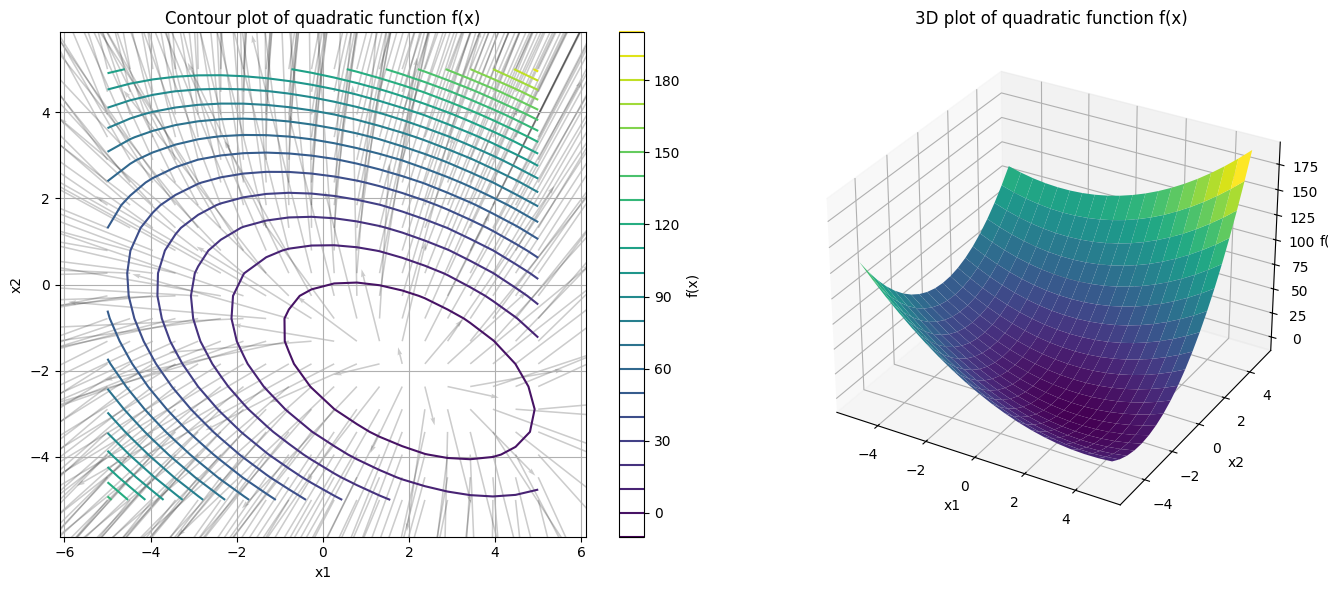

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

A = np.array([[3, 2], [2, 6]])
b = np.array([2, -8])
c = 0

# 定义二次型
def f(x):
    return 0.5 * x.T @ A @ x - b.T @ x + c

def grad_f(x):
    print(x)
    return A @ x - b[:, np.newaxis]

# 画图设置
x1 = np.linspace(-5, 5, 20)
x2 = np.linspace(-5, 5, 20)
X1, X2 = np.meshgrid(x1, x2)

Z = np.zeros_like(X1)
for i in range(len(x1)):
    for j in range(len(x2)):
        x = np.array([X1[i, j], X2[i, j]])
        Z[i, j] = f(x)
        
U = np.zeros_like(X1)
V = np.zeros_like(X2)
for i in range(len(x1)):
    for j in range(len(x2)):
        x = np.array([X1[i, j], X2[i, j]])
        grad = A @ x - b
        U[i, j] = grad[0]
        V[i, j] = grad[1]
        
fig = plt.figure(figsize=(14, 6))

# 子图(左)：等值线图
ax1 = fig.add_subplot(1, 2, 1)
contour = ax1.contour(X1, X2, Z, levels=20, cmap='viridis')
fig.colorbar(contour, ax=ax1, label='f(x)')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_title('Contour plot of quadratic function f(x)')
ax1.grid(True)
ax1.axis('equal')

ax1.quiver(X1, X2, U, V, scale=20, color='black', alpha=0.2)

# 子图(右)：3D示意图
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(X1, X2, Z, cmap='viridis', edgecolor='none')
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_zlabel('f(x)')
ax2.set_title('3D plot of quadratic function f(x)')
ax2.grid(True)

plt.tight_layout()
plt.show()

我们有定理如下:

${\boldsymbol{u}}\in\mathbb{R}^n$ 是 ${\boldsymbol{A}}{\boldsymbol{x}}={\boldsymbol{b}}$ 的解的充分必要条件是，$\boldsymbol{u}$ 是二次函数 $f({\boldsymbol{x}})=\displaystyle\frac{1}{2}{\boldsymbol{x}}^\top{\boldsymbol{A}}{\boldsymbol{x}}-{\boldsymbol{b}}^\top{\boldsymbol{x}}$ 的极小点.

假设线性方程组 ${\boldsymbol{A}}{\boldsymbol{x}}={\boldsymbol{b}}$ 的系数矩阵是 $n$ 阶实对称正定矩阵，求方程组的问题可以化为求二次函数 $$f({\boldsymbol{x}})=\frac{1}{2}{\boldsymbol{x}}^\top{\boldsymbol{A}}{\boldsymbol{x}}-{\boldsymbol{b}}^\top{\boldsymbol{x}}$$ 的极小值问题. 考虑 $f({\boldsymbol{x}})$ 的梯度 $${\boldsymbol{g}}({\boldsymbol{x}})={\rm{grad}} f({\boldsymbol{x}})=\left[\frac{\partial f}{\partial x_1},\dots,\frac{\partial f}{\partial x_n}\right]^\top={\boldsymbol{A}}{\boldsymbol{x}}-{\boldsymbol{b}}$$

假设 ${\boldsymbol{x}}^{(0)}$ 是任意给定的初始点，从它出发沿某一规定方向 ${\boldsymbol{p}}^{(0)}$ 求函数 $f({\boldsymbol{x}})$ 在直线 ${\boldsymbol{x}}={\boldsymbol{x}}^{(0)}+t{\boldsymbol{p}}^{(0)}$ 上的极小点，设为 ${\boldsymbol{x}}^{(1)}$. 

再从 ${\boldsymbol{x}}^{(1)}$ 出发沿方向 ${\boldsymbol{p}}^{(1)}$ 寻找，如此继续下去...我们有以下定义

从点 ${\boldsymbol{x}}^{(k)}$ 出发沿某一规定方向 ${\boldsymbol{p}}^{(k)}$ 求函数 $f({\boldsymbol{x}})$ 在直线 $${\boldsymbol{x}}={\boldsymbol{x}}^{(k)}+t{\boldsymbol{p}}^{(k)}$$ 上的极小点，称 ${\boldsymbol{p}}^{(k)}$ 为**搜索方向** (search direction).

下面确定系数 $\alpha^{(k)}$ 使得关于 $t$ 的一元函数 $f({\boldsymbol{x}}^{(k)}+t{\boldsymbol{p}}^{(k)})$ 当 $t=\alpha^{(k)}$ 时为极小. 对 $t$ 求导 

$$\begin{align*}\frac{{\rm{d}}f({\boldsymbol{x}}^{(k)}+t{\boldsymbol{p}}^{(k)})}{{\rm{d}}t}&=\displaystyle\frac{{\rm{d}}}{{\rm{d}t}}\left(\frac{1}{2}({\boldsymbol{x}}^{(k)}+t{\boldsymbol{p}}^{(k)})^\top{\boldsymbol{A}}({\boldsymbol{x}}^{(k)}+t{\boldsymbol{p}}^{(k)})-{\boldsymbol{b}}^\top({\boldsymbol{x}}^{(k)}+t{\boldsymbol{p}}^{(k)})\right)\\&=t({\boldsymbol{p}}^{(k)})^\top{\boldsymbol{A}}{\boldsymbol{p}}^{(k)}+({\boldsymbol{p}}^{(k)})^\top({\boldsymbol{A}}{\boldsymbol{x}}^{(k)}-{\boldsymbol{b}})\end{align*}$$

令上式在 $t=0$ 处的表达式为 0，则 $\displaystyle t=\alpha^{(k)}=-\frac{({\boldsymbol{p}}^{(k)})^\top({\boldsymbol{A}}{\boldsymbol{x}}^{(k)}-{\boldsymbol{b}})}{({\boldsymbol{p}}^{(k)})^\top{\boldsymbol{A}}{\boldsymbol{p}}^{(k)}}$ 且二阶导数大于 0. 因此，$${\boldsymbol{x}}^{(k+1)}={\boldsymbol{x}}^{(k)}+\alpha^{(k)}{\boldsymbol{p}}^{(k)}$$ 就是函数 $f({\boldsymbol{x}})$ 在直线 ${\boldsymbol{x}}={\boldsymbol{x}}^{(k)}+t{\boldsymbol{p}}^{(k)}$ 上的极小点. 若残差向量记为 $${\boldsymbol{r}}^{(k)}={\boldsymbol{b}}-{\boldsymbol{A}}{\boldsymbol{x}}^{(k)}$$从梯度公式可知，$${\boldsymbol{r}}^{(k)}=-{\boldsymbol{g}}({\boldsymbol{x}}^{(k)})=-{\rm{grad}} f({\boldsymbol{x}}^{(k)})$$ 则 $\alpha^{(k)}$ 可以表示成 $$\alpha^{(k)}=\frac{({\boldsymbol{r}}^{(k)})^\top{\boldsymbol{p}}^{(k)}}{({\boldsymbol{p}}^{(k)})^\top{\boldsymbol{A}}{\boldsymbol{p}}^{(k)}}=\left[\frac{{\boldsymbol{r}}^\top{\boldsymbol{p}}}{{\boldsymbol{p}}^\top{\boldsymbol{A}}{\boldsymbol{p}}}\right]^{(k)}$$

综上所述，共轭梯度法的迭代公式为 

$${\boldsymbol{x}}^{(k+1)}={\boldsymbol{x}}^{(k)}+\alpha^{(k)}{\boldsymbol{p}}^{(k)},\quad k=0,1,2,\dots$$

其中 $\alpha^{(k)}$ 满足 $$\alpha^{(k)}=\left[\frac{{\boldsymbol{r}}^\top{\boldsymbol{p}}}{{\boldsymbol{p}}^\top{\boldsymbol{A}}{\boldsymbol{p}}}\right]^{(k)}$$ 显然，此迭代具有**下降**性质 $$f({\boldsymbol{x}}^{(k+1)})\le f({\boldsymbol{x}}^{(k)})$$

对于任意的初始近似值 ${\boldsymbol{x}}^{(0)}$，第一个搜索方向 ${\boldsymbol{p}}^{(0)}$ 为 $${\boldsymbol{p}}^{(0)}={\boldsymbol{r}}^{(0)}={\boldsymbol{b}}-{\boldsymbol{A}}{\boldsymbol{x}}^{(0)}$$ 由 CG 迭代公式计算得 ${\boldsymbol{x}}^{(1)}={\boldsymbol{x}}^{(0)}+\alpha^{(0)}{\boldsymbol{p}}^{(0)}$ 其中 $$\alpha^{(0)}=\left[\frac{{\boldsymbol{r}}^\top{\boldsymbol{p}}}{{\boldsymbol{p}}^\top{\boldsymbol{A}}{\boldsymbol{p}}}\right]^{(0)}$$ 且 ${\boldsymbol{p}}^{(0)}\ne{\boldsymbol{0}}$，否则 ${\boldsymbol{x}}^{(0)}$ 就是方程组的解. 得到下一个残差 $${\boldsymbol{r}}^{(1)}={\boldsymbol{b}}-{\boldsymbol{A}}{\boldsymbol{x}}^{(0)}$$ 在 ${\boldsymbol{r}}^{(0)}$ 和 ${\boldsymbol{r}}^{(1)}$ 张成的子空间中搜索方向 ${\boldsymbol{p}}^{(1)}$ 令 $${\boldsymbol{p}}^{(1)}={\boldsymbol{r}}^{(1)}+\beta^{(0)}{\boldsymbol{r}}^{(0)}={\boldsymbol{r}}^{(1)}+\beta^{(0)}{\boldsymbol{p}}^{(0)}$$ 由共轭条件，有 $({\boldsymbol{p}}^{(1)})^\top{\boldsymbol{A}}{\boldsymbol{p}}^{(0)}=0$ 从而由 Gram-Schmidt 正交过程解得 $\displaystyle\beta^{(0)}=-\frac{({\boldsymbol{r}}^{(1)})^\top{\boldsymbol{A}}{\boldsymbol{p}}^{(0)}}{({\boldsymbol{p}}^{(0)})^\top{\boldsymbol{A}}{\boldsymbol{p}}^{(0)}}$.

如此继续，我们得到一个迭代公式. 

给定初始近似值 ${\boldsymbol{x}}^{(0)}$，取 
$${\boldsymbol{p}}^{(0)}={\boldsymbol{r}}^{(0)}={\boldsymbol{b}}-{\boldsymbol{A}}{\boldsymbol{x}}^{(0)}$$ 对 $k=0,1,\dots$ 计算
$$\alpha^{(k)}=\frac{({\boldsymbol{r}}^{(k)})^\top{\boldsymbol{p}}^{(k)}}{({\boldsymbol{p}}^{(k)})^\top{\boldsymbol{A}}{\boldsymbol{p}}^{(k)}}$$
$${\boldsymbol{x}}^{(k+1)}={\boldsymbol{x}}^{(k)}+\alpha^{(k)}{\boldsymbol{p}}^{(k)}$$
$${\boldsymbol{r}}^{(k+1)}={\boldsymbol{r}}^{(k)}-\alpha^{(k)}{\boldsymbol{A}}{\boldsymbol{p}}^{(k)}$$ 
$$\beta^{(k)}=-\frac{({\boldsymbol{r}}^{(k+1)})^\top{\boldsymbol{A}}{\boldsymbol{p}}^{(k)}}{({\boldsymbol{p}}^{(k)})^\top{\boldsymbol{A}}{\boldsymbol{p}}^{(k)}}$$
$${\boldsymbol{p}}^{(k+1)}={\boldsymbol{r}}^{(k+1)}+\beta^{(k)}{\boldsymbol{p}}^{(k)}$$

In [21]:
import numpy as np

def conjugate_gradient(A, b, p, tau=1e-10, N=1000):
    n = len(b)
    x = p.copy()
    r = b - np.dot(A, x)
    p = r.copy()
    rsold = np.dot(r, r)

    for i in range(N):
        Ap = np.dot(A, p)
        alpha = rsold / np.dot(p, Ap)
        x = x + alpha * p
        r = r - alpha * Ap
        rsnew = np.dot(r, r)
        if np.sqrt(rsnew) < tau:
            print(f'在 {i+1} 步迭代后 CG 收敛.')
            return x
        beta = rsnew / rsold
        p = r + beta * p
        rsold = rsnew

    print(f'达到最大迭代次数 ({N}).')
    return None

In [22]:
# 测试数据
A = np.array([[10, -1, 2, 0], 
              [-1, 11, -1, 3], 
              [2, -1, 10, -1], 
              [0, 3, -1, 8]], dtype=float)
b = np.array([6, 25, -11, 15], dtype=float)
p = np.zeros(b.shape)

x = conjugate_gradient(A, b, p)
if x is not None:
    print("近似解:", x)

在 4 步迭代后 CG 收敛.
近似解: [ 1.  2. -1.  1.]


##### 最速下降法

从多元微积分可知，函数 $f(\boldsymbol{x})$ 的最大下降方向是 $-\nabla f(\boldsymbol{x})$.

当我们直接取 $${\boldsymbol{p}}^{(k)}={\boldsymbol{r}}^{(k)}=-{\rm{grad}} f({\boldsymbol{x}}^{(k)})$$ 时，叫做**最速下降** (steepest descent) 法. 此时，有 $${\boldsymbol{x}}^{(k+1)}={\boldsymbol{x}}^{(k)}+\alpha^{(k)}{\boldsymbol{r}}^{(k)},\quad k=0,1,2,\dots$$ 和 $$\alpha^{(k)}=\left[\frac{{\boldsymbol{r}}^\top{\boldsymbol{r}}}{{\boldsymbol{r}}^\top{\boldsymbol{A}}{\boldsymbol{r}}}\right]^{(k)}$$

##### 共轭方向法

取共轭向量序列 $\{ {\boldsymbol{p}}^{(k)} \}_{k=0}^{n-1}$ 作为搜索方向时，即$$({\boldsymbol{p}}^{(i)})^\top{\boldsymbol{A}}{\boldsymbol{p}}^{(j)}=0,\quad i\ne j$$叫做**共轭方向** (conjugate direction) 法. 用 $L^{(k)}$ 表示线性无关向量系 $\{ {\boldsymbol{p}}^{(k)} \}_{k=0}^{n-1}$ 所张成的子空间，$\pi^{(k)}$ 表示线性流形 $$\pi^{(k)}=\{{\boldsymbol{x}}|{\boldsymbol{x}}={\boldsymbol{x}}^{(0)}+{\boldsymbol{z}},{\boldsymbol{x}}\in L^{(k)}\}$$ 由共轭方向法得到的点序列 ${\boldsymbol{x}}^{(0)},{\boldsymbol{x}}^{(1)},\dots,{\boldsymbol{x}}^{(k)},\dots$ 具有性质 $$f({\boldsymbol{x}}^{(k)})=\min_{{\boldsymbol{z}}\in L^{(k)}}\, f({\boldsymbol{x}}^{(0)}+{\boldsymbol{z}})$$ 

共轭方向法至多进行 $n$ 步，便可得到方程组的准确解. 它本质上是直接法. 

##### Krylov 子空间迭代法

Krylov 子空间迭代法是一类求解线性方程组和特征值问题的迭代方法，基本思想是构造一个序列的 Krylov 子空间，然后在这些子空间中寻找解的近似值. Krylov子空间的定义依赖于初始向量和矩阵的幂次，形如

$$\mathcal{K}_m({{\boldsymbol{A}},{\boldsymbol{v}}})=\mathsf{span}\{{\boldsymbol{v}},{\boldsymbol{Av}},{\boldsymbol{A}}^2{\boldsymbol{v}},\dots,{\boldsymbol{A}}^{m-1}{\boldsymbol{v}}\}$$

其中，$\boldsymbol{A}$ 是给定的矩阵，$\boldsymbol{v}$ 是任意非零初始向量，$\boldsymbol{m}$是子空间的维度.

通过迭代逐渐增加子空间的维度，利用子空间中的信息来逼近原问题的解. 

共轭梯度法是一类特殊的 Krylov 子空间方法，用于求解系数矩阵**对称正定**的线性方程组. CG 的核心思想是在每一步迭代中选择一个方向进行搜索，该方向不仅与前面的搜索方向共轭（即满足一定的正交性），同时也能确保沿这个方向的移动是有效的（即快速减少误差）. CG 避免存储 $\mathcal{K}$ 的所有基向量，并证明残差向量与其余所有基向量共轭正交. 